# Unit 4 - Missing values 
---

1. [Find rows with missing values](#section1)
2. [Drop missing values using dropna()](#section2)
3. [Fill missing values using fillna()](#section3)
4. [Fill missing values using interpolate()](#section4)
5. [Replace values](#section5)
5. [A note on slicing - copy()](#section6)






In [1]:
import pandas as pd
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
vacc_df = pd.read_csv(url)
vacc_df.shape

(160591, 16)

Remove places that are not countries

In [3]:
vacc_df = vacc_df[(vacc_df.location != "Europe") & 
                            (vacc_df.location != "High income") &
                            (vacc_df.location != "World") &
                            (vacc_df.location != "European Union") &
                            (vacc_df.location != "North America") &
                            (vacc_df.location != "Upper middle income") &
                            (vacc_df.location != "Lower middle income") &
                            (vacc_df.location != "Asia") &
                            (vacc_df.location != "South America")]

---
>## Reminder:
>##### Treating missing values is optional. Sometimes we just leave the dataframe with missing values!!
---


<a id='section1'></a>
### 1. Find rows with missing values

`null` / `na` - no value

`NaN` - **N**ot **a** **N**umber - the value is missing. This value will be ignored in calculations such as `.mean()`

`isnull()` is a pandas function, so either use it on a dataframe or call it through pd

In [4]:
vacc_df.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003


In [5]:
vacc_df.isnull().sum().to_frame('nulls')

,nulls
location,0
iso_code,0
date,0
total_vaccinations,87357
people_vaccinated,90467
people_fully_vaccinated,92698
total_boosters,118168
daily_vaccinations_raw,100018
daily_vaccinations,1095
total_vaccinations_per_hundred,87357


### <span style="color:blue"> Exercise:</span>
> use `isnull().sum()` to observe missing values only in the columns: `daily_vaccinations`, `total_vaccinations`
>
> use `notnull().sum()` to check how many `daily_vaccinations` were performed in Israel and in Norway
>
> show both of the above results in a dataframe

<a id='section2'></a>
### 2. Drop missing values using dropna() 

#### Before we begin: 
Why bother to remove missing values?


Suppose we would like to find the countries with the longest running vaccination program.\
This is not the right result, since it contains missing values:

In [6]:
vacc_df[["location"]].value_counts().head(10)

location     
Denmark          833
Russia           825
United States    822
Israel           822
Switzerland      820
Qatar            818
Czechia          815
Italy            815
Greece           814
France           814
dtype: int64

This is right, but long to write.. if we don't need the missing values, we can just remove them,\
or better yet - create a dataframe without them. 

In [7]:
vacc_df[~vacc_df["people_vaccinated"].isnull()][["location"]].value_counts().head(10)

location     
Denmark          827
United States    822
Italy            815
Germany          814
France           814
Estonia          813
Argentina        812
Czechia          811
Israel           808
Switzerland      804
dtype: int64

##### Look at Zimbabwe for example. Zimbabwe contains missing values:

In [8]:
zimbabwe = vacc_df.loc[vacc_df.location == 'Zimbabwe']
zimbabwe.head(2)

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
159992,Zimbabwe,ZWE,2021-02-18,39.0,39.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
159993,Zimbabwe,ZWE,2021-02-19,NaN,NaN,NaN,NaN,NaN,425.0,NaN,NaN,NaN,NaN,26.0,425.0,0.003


##### Remove all rows that contain one or more missing values: 

In [9]:
zimbabwe.dropna().head(2)

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
160304,Zimbabwe,ZWE,2021-12-27,7222381.0,4105296.0,3113142.0,3943.0,7741.0,12481.0,44.25,25.15,19.07,0.02,765.0,6425.0,0.039
160305,Zimbabwe,ZWE,2021-12-28,7226334.0,4107151.0,3115190.0,3993.0,3953.0,10627.0,44.28,25.17,19.09,0.02,651.0,5407.0,0.033


Note: `dropna()`, like most other functions in the pandas API returns a new DataFrame 
(a copy of the original with changes) as the result, so you should assign it back if you want to see changes:

In [10]:
zimbabwe.head(2)

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
159992,Zimbabwe,ZWE,2021-02-18,39.0,39.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
159993,Zimbabwe,ZWE,2021-02-19,NaN,NaN,NaN,NaN,NaN,425.0,NaN,NaN,NaN,NaN,26.0,425.0,0.003


assign it back:

In [11]:
zimbabwe = zimbabwe.dropna()
zimbabwe

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
160304,Zimbabwe,ZWE,2021-12-27,7222381.0,4105296.0,3113142.0,3943.0,7741.0,12481.0,44.25,25.15,19.07,0.02,765.0,6425.0,0.039
160305,Zimbabwe,ZWE,2021-12-28,7226334.0,4107151.0,3115190.0,3993.0,3953.0,10627.0,44.28,25.17,19.09,0.02,651.0,5407.0,0.033
160306,Zimbabwe,ZWE,2021-12-29,7238939.0,4112517.0,3121776.0,4646.0,12605.0,10190.0,44.35,25.20,19.13,0.03,624.0,4796.0,0.029
160309,Zimbabwe,ZWE,2022-01-01,7276239.0,4130228.0,3140338.0,5673.0,11448.0,9599.0,44.58,25.31,19.24,0.03,588.0,4308.0,0.026
160310,Zimbabwe,ZWE,2022-01-02,7288786.0,4133140.0,3144021.0,11625.0,12547.0,10592.0,44.66,25.32,19.26,0.07,649.0,4265.0,0.026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160576,Zimbabwe,ZWE,2022-09-25,12187779.0,6425581.0,4739732.0,1022466.0,3446.0,2625.0,74.68,39.37,29.04,6.26,161.0,824.0,0.005
160577,Zimbabwe,ZWE,2022-09-26,12190411.0,6426048.0,4740667.0,1023696.0,2632.0,2889.0,74.69,39.37,29.05,6.27,177.0,845.0,0.005
160578,Zimbabwe,ZWE,2022-09-27,12201937.0,6431444.0,4744523.0,1025970.0,11526.0,4424.0,74.76,39.41,29.07,6.29,271.0,1570.0,0.010
160583,Zimbabwe,ZWE,2022-10-02,12214870.0,6435481.0,4748232.0,1031157.0,2276.0,3870.0,74.84,39.43,29.09,6.32,237.0,1414.0,0.009


Re-read the df so we have the NaNs again

In [12]:
zimbabwe = vacc_df.loc[vacc_df.location == 'Zimbabwe']

#### Remove all values for a specific column - using `subset`

In [13]:
zimbabwe.dropna(subset = ['total_vaccinations', 'total_boosters'])

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
160304,Zimbabwe,ZWE,2021-12-27,7222381.0,4105296.0,3113142.0,3943.0,7741.0,12481.0,44.25,25.15,19.07,0.02,765.0,6425.0,0.039
160305,Zimbabwe,ZWE,2021-12-28,7226334.0,4107151.0,3115190.0,3993.0,3953.0,10627.0,44.28,25.17,19.09,0.02,651.0,5407.0,0.033
160306,Zimbabwe,ZWE,2021-12-29,7238939.0,4112517.0,3121776.0,4646.0,12605.0,10190.0,44.35,25.20,19.13,0.03,624.0,4796.0,0.029
160308,Zimbabwe,ZWE,2021-12-31,7264791.0,4124378.0,3135168.0,5245.0,NaN,9145.0,44.51,25.27,19.21,0.03,560.0,4099.0,0.025
160309,Zimbabwe,ZWE,2022-01-01,7276239.0,4130228.0,3140338.0,5673.0,11448.0,9599.0,44.58,25.31,19.24,0.03,588.0,4308.0,0.026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160582,Zimbabwe,ZWE,2022-10-01,12212594.0,6435008.0,4747263.0,1030323.0,NaN,4037.0,74.83,39.43,29.09,6.31,247.0,1455.0,0.009
160583,Zimbabwe,ZWE,2022-10-02,12214870.0,6435481.0,4748232.0,1031157.0,2276.0,3870.0,74.84,39.43,29.09,6.32,237.0,1414.0,0.009
160584,Zimbabwe,ZWE,2022-10-03,12216848.0,6435970.0,4748940.0,1031938.0,1978.0,3777.0,74.86,39.43,29.10,6.32,231.0,1417.0,0.009
160586,Zimbabwe,ZWE,2022-10-05,12219760.0,6436704.0,4750104.0,1032952.0,NaN,2076.0,74.87,39.44,29.11,6.33,127.0,638.0,0.004


### We can now answer a question such as - which countries have the longest running vaccination programs?

### <span style="color:blue"> Exercise:</span>

> Create a dataset that doesn't have null values for `people_vaccinated`
>
> Use `value counts` - count how many times each `location` shows up:


---
>A summary of the functions so far:
>
>* `to_frame(name= ['column_name'])` - converts a series to a dataframe
>* `.isnull()` - display rows that contain missing values
>* `.notnull()` - display rows that don't contain missing values
>* `.dropna()` - Remove rows with missing values according to parameters:
    * `.dropna()` (default) - drops rows if at least one column has NaN
    * `.dropna(subset = ['column_name'])` - drop rows that contain missing values in the subset of column names
    * `.dropna(how='all')` - drops rows only if all of its columns have NaNs
    * `.dropna(thresh = k)` - k how many non-null values you want to keep (k=3 means the row should contain at least 3 non-null values)
    * `.dropna(axis=1)` - drop columns instead of rows
>

See documnetation [here.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

---


<a id='section3'></a>
### 3. Fill missing values using fillna()

Before we begin - why fill missing values?
One reason might be is that otherwise figures will not be drawn correctly\
Note: you do not need to know to draw figures at theis point

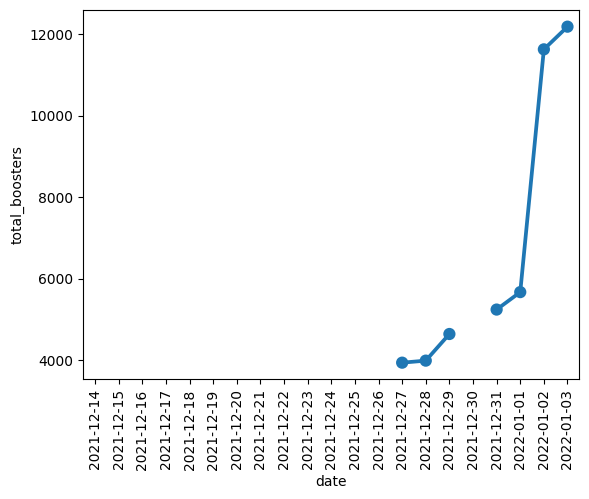

In [14]:
import seaborn as sns
ax = sns.pointplot(zimbabwe.iloc[299:320,], x="date", y="total_boosters")
ax.tick_params(axis='x', rotation=90)

Use `.fillna()` to fill missing dataframe values with:
* Whatever value you choose
* Mean, median, mode

This is called *imputation*

Replace all NaNs with 0s

In [15]:
vacc_df.fillna(0, inplace = False )
vacc_df

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160586,Zimbabwe,ZWE,2022-10-05,12219760.0,6436704.0,4750104.0,1032952.0,NaN,2076.0,74.87,39.44,29.11,6.33,127.0,638.0,0.004
160587,Zimbabwe,ZWE,2022-10-06,NaN,NaN,NaN,NaN,NaN,1714.0,NaN,NaN,NaN,NaN,105.0,563.0,0.003
160588,Zimbabwe,ZWE,2022-10-07,NaN,NaN,NaN,NaN,NaN,1529.0,NaN,NaN,NaN,NaN,94.0,462.0,0.003
160589,Zimbabwe,ZWE,2022-10-08,NaN,NaN,NaN,NaN,NaN,1344.0,NaN,NaN,NaN,NaN,82.0,361.0,0.002


>`inplace = False` is the default. This doesn't change the vacc_df dataframe. 
>
>To change it you need:
>
>`vacc_df.fillna(0 , inplace = True)`
>
>or to assign:
>
>`vacc_df = vacc_df.fillna(0)`
>
>But we won't do that! This is where some **business understanding** comes in: it's not a good idea to fill a column like `total_vaccinations` with 0s. 
>
>See what happens:

In [16]:
vacc_df.fillna(0).head(10)

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.000
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.0,0.0,33.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.0,0.0,33.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.0,0.0,33.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.0,0.0,33.0,1367.0,0.003
5,Afghanistan,AFG,2021-02-27,0.0,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.0,0.0,33.0,1367.0,0.003
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,0.0,0.0,0.0,1367.0,0.02,0.02,0.0,0.0,33.0,1367.0,0.003
7,Afghanistan,AFG,2021-03-01,0.0,0.0,0.0,0.0,0.0,1580.0,0.00,0.00,0.0,0.0,38.0,1580.0,0.004
8,Afghanistan,AFG,2021-03-02,0.0,0.0,0.0,0.0,0.0,1794.0,0.00,0.00,0.0,0.0,44.0,1794.0,0.004
9,Afghanistan,AFG,2021-03-03,0.0,0.0,0.0,0.0,0.0,2008.0,0.00,0.00,0.0,0.0,49.0,2008.0,0.005


So we'll use 0's only for the daily_vaccinations columns, and perhaps for some other columns (which?)

In [17]:
vacc_df['daily_vaccinations'].fillna(0 , inplace = True)

Other options - using central measures:

In [18]:
# Using median
vacc_df['daily_vaccinations'].fillna(vacc_df['daily_vaccinations'].median(), inplace=True)
  
# Using mean
#vacc_df['daily_vaccinations'].fillna(vacc_df['daily_vaccinations'].mean(), inplace=True)
  
# Using mode
#vacc_df['daily_vaccinations'].fillna(vacc_df['daily_vaccinations'].mode(), inplace=True)


What about `total_vaccinations`? - there are some `NaN`s there as well:

In [19]:
vacc_df.iloc[52:62,[0,2,3]]

,location,date,total_vaccinations
52,Afghanistan,2021-04-15,NaN
53,Afghanistan,2021-04-16,NaN
54,Afghanistan,2021-04-17,NaN
55,Afghanistan,2021-04-18,NaN
56,Afghanistan,2021-04-19,NaN
57,Afghanistan,2021-04-20,NaN
58,Afghanistan,2021-04-21,NaN
59,Afghanistan,2021-04-22,240000.0
60,Afghanistan,2021-04-23,NaN
61,Afghanistan,2021-04-24,NaN


For the `total_vaccinations` we'll use `ffill` which fills the missing values with first non-missing value that occurs before it.

Yes, `bfill` exists as well. If does what you think it does :-)

In [20]:
vacc_df[['date','total_vaccinations']].fillna(method='ffill')[52:62]
#vacc_df['total_vaccinations'][52:62]

,date,total_vaccinations
52,2021-04-15,120000.0
53,2021-04-16,120000.0
54,2021-04-17,120000.0
55,2021-04-18,120000.0
56,2021-04-19,120000.0
57,2021-04-20,120000.0
58,2021-04-21,120000.0
59,2021-04-22,240000.0
60,2021-04-23,240000.0
61,2021-04-24,240000.0


check it again - what happened?

In [21]:
vacc_df.iloc[52:62,[0,2,3]]

,location,date,total_vaccinations
52,Afghanistan,2021-04-15,NaN
53,Afghanistan,2021-04-16,NaN
54,Afghanistan,2021-04-17,NaN
55,Afghanistan,2021-04-18,NaN
56,Afghanistan,2021-04-19,NaN
57,Afghanistan,2021-04-20,NaN
58,Afghanistan,2021-04-21,NaN
59,Afghanistan,2021-04-22,240000.0
60,Afghanistan,2021-04-23,NaN
61,Afghanistan,2021-04-24,NaN


The last value for some country might be NaN 

Business understanding: this isn't good enought! We need to aggregate by country!!

In [22]:
vacc_df['total_vacc_no_missing'] =vacc_df.groupby(['location'],group_keys=True)[['total_vaccinations']].\
apply(lambda x: x.fillna(method='ffill')).reset_index()[["total_vaccinations"]]
vacc_df.iloc[753:759,[0,2,3,16]]

,location,date,total_vaccinations,total_vacc_no_missing
753,Afghanistan,2023-03-17,NaN,16250654.0
754,Afghanistan,2023-03-18,NaN,16250654.0
755,Afghanistan,2023-03-19,16474895.0,16474895.0
756,Africa,2021-01-09,0.0,0.0
757,Africa,2021-01-10,0.0,0.0
758,Africa,2021-01-11,0.0,0.0


<a id='section4'></a>
### 4. Fill missing values using interpolate()

In [23]:
vacc_df['total_vacc_interpolate'] = vacc_df['total_vaccinations'].interpolate(method ='linear') 
vacc_df.iloc[44:62,[0,2,3,16, 17]]

,location,date,total_vaccinations,total_vacc_no_missing,total_vacc_interpolate
44,Afghanistan,2021-04-07,120000.0,120000.0,120000.000000
45,Afghanistan,2021-04-08,NaN,120000.0,128000.000000
46,Afghanistan,2021-04-09,NaN,120000.0,136000.000000
47,Afghanistan,2021-04-10,NaN,120000.0,144000.000000
48,Afghanistan,2021-04-11,NaN,120000.0,152000.000000
49,Afghanistan,2021-04-12,NaN,120000.0,160000.000000
50,Afghanistan,2021-04-13,NaN,120000.0,168000.000000
51,Afghanistan,2021-04-14,NaN,120000.0,176000.000000
52,Afghanistan,2021-04-15,NaN,120000.0,184000.000000
53,Afghanistan,2021-04-16,NaN,120000.0,192000.000000


<a id='section5'></a>
### 5. Replace values

### <span style="color:blue"> Exercise:</span>

> Sometimes we need to replace values, not fill missing values.
>
>[replace documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)
>
> you try!
>
> read the documentation and try to figure out how it's done

---
>A summary of the functions so far:
>
>* `.fillna()` - fill missing values according to parameters:
    * `.fillna('k')`  - with value k, create a new dataframe
    * `.fillna('k', inplace = True)` - with value k, into the existing dataframe
    * `.fillna(method='ffill')` - fill with first non-missing value that occurs before it 
    * `.fillna(method='bfill')` - fill with first non-missing value that occurs after it  
> * `interpolate` - fill using some interpolation technique
> * `replace(x,y)` - replace x with y
>
>See documnetation:
>
>* [Missing data handling documentation](https://pandas-docs.github.io/pandas-docs-travis/reference/frame.html#missing-data-handling)
---

---
<a id='section6'></a>

## 6. A note on slicing

Slicing is taking only part of a dataframe. For example - the slice we named zimbabwe:

In [24]:
zimbabwe = vacc_df.loc[vacc_df.location == 'Zimbabwe']

When we change data in a slice, we are changing the ORIGINAL dataframe. This will cause a warning to appear:

In [25]:
zimbabwe.fillna(0, inplace=True)

C:\Users\lihin\AppData\Local\Temp\ipykernel_12300\1450805206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zimbabwe.fillna(0, inplace=True)


It is only a warning, but this is bad practice. Best way to avoid it is to create a `copy` of the dataframe:

In [26]:
zimbabwe = vacc_df.loc[vacc_df.location == 'Zimbabwe'].copy()
zimbabwe.fillna(0, inplace=True)

This works fine, no warnings. Note - this won't change the original dataframe (which might be a good thing, if you didn't plan to change it, or a bad thing, if you did)

By default, changes in the original dataframe will not change the copy.

In [27]:
small_example = pd.Series([1, 2], index=["a", "b"])
small_example

a    1
b    2
dtype: int64

deep copy

In [28]:
my_deep_copy = small_example.copy()
my_deep_copy

a    1
b    2
dtype: int64

Make a change to the dataframe - where will it appear?

In [29]:
small_example[0] = -100
small_example

a   -100
b      2
dtype: int64

In [30]:
my_deep_copy

a    1
b    2
dtype: int64

If you do  want your copy to change, use a shallow copy:

In [31]:
my_shallow_copy = small_example.copy(deep=False)
my_shallow_copy

a   -100
b      2
dtype: int64

In [32]:
small_example[0] = -200
small_example

a   -200
b      2
dtype: int64

In [33]:
my_shallow_copy

a   -200
b      2
dtype: int64

---
>A summary:
>
>* `.copy()` - creates a copy of the slice of the dataframe
>
>* `.copy(deep=False)` - updates to the original dataframe will show in the copy
---